## REPORTE Nº8 :
#### Alumno: Sonia Margarita Lecaros Jimenez / Código: 20226229
#### Curso: Fundamentos de Macroeconomia - 1REI05

## Lectura
Para esta semana tienen que presentar un report de la lectura.

Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903

Tienen que responder a manera de ensayo las siguientes preguntas:

El articulo de esta semana es The persistent effects of Peru's mining mita. Lo que busca la autora es explicar a traves de una regresión discontinua los impactos a largo plazo de la mita, que era una forma de trabajo en la época de la conquista, el reporte trata de explicar los efectos de la mita en los lugares donde se llevo a cabo por más de 100 años, su impacto en el crecimiento económico y el retraso en el crecimiento de la niñez en esas localidades.

El articulo tambien explora la posible variación exógena en la asignación de la mita para identificar los canales a través de los cuales influye en el desarrollo económico comtemporáneo.

Como fortaleza podemos decir que el articulo trata de explicar el origen de muchas carencias en las poblaciones rurales que fueron sometidas a la mita y como desde epocas antiguas se promovia la explotación para garantizar el crecimiento económico del estado (en este caso la corona española). Tambien trata de esclarecer como el desarrollo de modelos generales de evolución institucional y la investigación empírica acerca de la forma en la que las limitaciones son influidas por las fuerzas que promueven el cambio.  

El articulo señala diversos ámbitos que se han visto afectados a lo largo del tiempo por las mitas como por ejemplo la agricultura, educación, consumo familiar, vias de comunicación. 




In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd


# Código
## Instrumental Variables
1. Para esta primera sección deben darle una leida a The Effect Book principalmente al capitulo de Instrumental Variables.
* Explique en qué consiste el supuesto de "Relevance"
* Explique en qué consiste el supuesto de "Validity"



Las variables instrumentales es un metodo muy popular para resolver el problema de variables explicativas endógenas.
Ejemplo

$$log(salario)=β_0+β_1educ+β_2habil+e$$

Aqui el término de error que queremos encontrar es $e$ pero como no podemos obtener $habil$, entonces solo nos queda estimar

$$log(salario)=β_0+β_1educ+u$$

Donde $habil$ forma parte de $u$. 

Entonces podemos resolver este problema si encontramos una Variable Instrumental para $educ$

En una regresión simple

$$y= β_0+β_1x+u$$ (1)

Y tenemos que $cov(x,u)≠ 0$

Entonces tenemos una variable #observable# $z$ que cumple con las siguientes condiciones: 

$$cov(x,u)= 0$$   (2)
$$cov(x,u)≠ 0$$   (3)

* Entonces se dice que $z$ es una $variable$ $instrumental$ de $x$ o un $intrumento$ para $x$. 

La condición (2) se llama exogeneidad del instrumento e implica que 

* $z$ es $exógena$ en la regresión

$cov(x,u)≠ 0$

* $z$ no tiene efecto parcial en $y$. 
* $z$ no esta correlacionada con las variables omitidas en el modelo.

La condición (3) se llama relevancia del instrumento e implica que

* $z$ este correlacionada con $x$ (positiva o negativamente)
* $z$ explica variabilidad de $x$


$$cov(x,u)= 0$$   (2)
$$cov(x,u)≠ 0$$   (3)

* Las dos condiciones son diametralmente diferentes 
* No se observa $u$ en la segunda condición por lo que probar la exogeneidad del instrumento es imposible.
* La relevancia del instrumento si es posible de probar

La utilidad de la regresión de variables instrumentales está supeditada a la existencia de
instrumentos válidos. La validez de un instrumento es conocida como la hipotesis nula de exogeneidad y son variables no incluidas en la ecuación de interés que, estando muy correlacionadas con las variables explicativas potencialmente endógenas,
no estén correlacionadas con el término de error de la ecuación de interés.










In [12]:
## Installing the environment
#!pip install seaborn
#!pip install causalgraphicalmodels
#!pip install plotnine
#!pip install linearmodels

In [5]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

In [6]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


          educ                                                  
         count       mean       std  min   25%   50%   75%   max
nearc4                                                          
0.0      957.0  12.698014  2.791528  1.0  12.0  12.0  15.0  18.0
1.0     2053.0  13.527034  2.580459  2.0  12.0  13.0  16.0  18.0
     nearc4                                               
      count      mean       std  min   25%  50%   75%  max
educ                                                      
1.0     1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
2.0     2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
3.0     3.0  0.666667  0.577350  0.0  0.50  1.0  1.00  1.0
4.0     3.0  0.333333  0.577350  0.0  0.00  0.0  0.50  1.0
5.0    10.0  0.500000  0.527046  0.0  0.00  0.5  1.00  1.0
6.0    16.0  0.500000  0.516398  0.0  0.00  0.5  1.00  1.0
7.0    29.0  0.413793  0.501230  0.0  0.00  0.0  1.00  1.0
8.0    68.0  0.426471  0.498241  0.0  0.00  0.0  1.00  1.0
9.0    81.0  0.506173  0.5

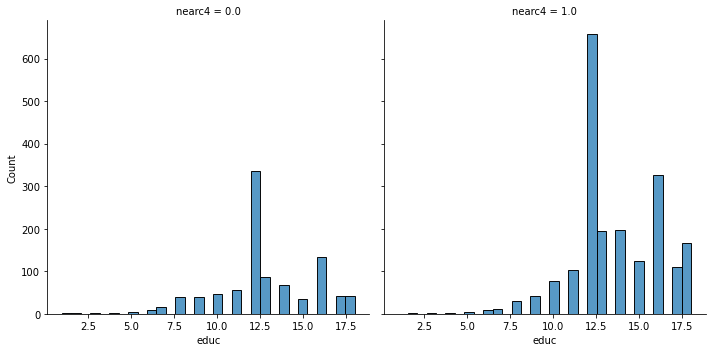

In [7]:
sns.displot(card, x="educ",col="nearc4")
card_temp = card[['educ','nearc4']]
print(card_temp.groupby(["nearc4"]).describe())
print(card_temp.groupby(["educ"]).describe())

###  Basado en el histograma years of education (educ)
##### Cuando no hay un college en el area (nearc4 =0) 
##### Cuando hay un college en el area (nearc4 =1) 

1. La cantidad de personas que tomaron la encuesta en un area donde hay college es superior en donde no hay.
2. La cantidad de personas que continuan con una educacion de duracion mayor a 10 anos es superior cuando hay un college en el area.
3. En porcentajes la cantidad de personas que realizan una educacion menor de diez anos es similar en ambos grupos

###  Basado en el histograma years of education (lwage)
##### Cuando no hay un college en el area (nearc4 =0) 
##### Cuando hay un college en el area (nearc4 =1) 

1. El grupo que tiene un college en el area tiene un mayor promedio  y media de wage que los que no tienen college en el area
2.La histograma cuando hay un college en el area muestra que la gran mayoria esta en el rango de 5.5 - 7.0
con lo cual basado solo en el histograma se asume que tienen mayores ingreso las personas que tienen un college en el area

lwage                                                             \
         count      mean       std      min       25%       50%       75%   
nearc4                                                                      
0.0      957.0  6.155494  0.432841  4.60517  5.857933  6.175867  6.464588   
1.0     2053.0  6.311395  0.440222  4.60517  6.033086  6.349139  6.588926   

                  
             max  
nearc4            
0.0     7.474772  
1.0     7.784889

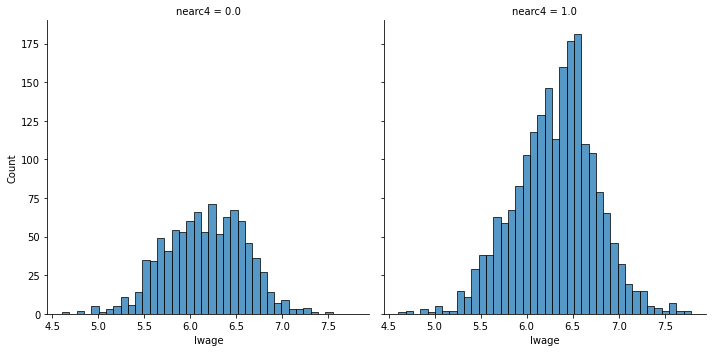

In [8]:
sns.displot(card, x="lwage",col="nearc4")
card_temp = card[['lwage','nearc4']]
card_temp.groupby(["nearc4"]).describe()

In [9]:
#OLS
#ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
#              data = card).fit()

ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + married + smsa + nearc4", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.66e-185
Time:                        21:46:04   Log-Likelihood:                -1385.7
No. Observations:                3003   AIC:                             2783.
Df Residuals:                    2997   BIC:                             2819.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7885      0.064     75.244      0.000       4.664       4.913
educ           0.0826      0.004     23.435      0.000       0.076       0.090
exper          0.0348      0.002     15.144      0.000       0.030       0.039
married       -0.0405      0.004    -11.565      0.000      -0.047      -0.034
smsa           0.1810      0.017     10.772      0.000       0.148       0.214
nearc4         0.0463      0.016      2.863      0.004       0.015       0.078
==============================================================================
Omnibus:                       43.346   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.830
Skew:                          -0.213   Prob(JB):                     2.05e-12
Kurtosis:                       3.499   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# There are null values in the dataset, we will fill them with 0
card['married'] = card['married'].fillna(0)
#2SLS
print("+++++++Result with nearc2+++++++++++++")
iv_reg1 = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
print(iv_reg1.summary)
print("+++++++Result with nearc4+++++++++++++")
iv_reg2 = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc4 ]", card).fit()
print(iv_reg2.summary)

+++++++Result with nearc2+++++++++++++
                          IV-2SLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        21:46:04   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black        